In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , roc_auc_score , roc_curve 
from scipy.stats import mode
import time
#import io
#from google.colab import files
#uploaded = files.upload()
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)

In [2]:
df = pd.read_csv("weatherHistory.csv")

In [3]:
#df = pd.read_csv("weatherHistory.csv")
#df = pd.read_csv(io.BytesIO(uploaded["weatherHistory.csv"]))

In [4]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
df.duplicated().sum() # 24 Duplicated Records

24

In [7]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96429 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96429 non-null  object 
 1   Summary                   96429 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           96429 non-null  float64
 4   Apparent Temperature (C)  96429 non-null  float64
 5   Humidity                  96429 non-null  float64
 6   Wind Speed (km/h)         96429 non-null  float64
 7   Wind Bearing (degrees)    96429 non-null  float64
 8   Visibility (km)           96429 non-null  float64
 9   Loud Cover                96429 non-null  float64
 10  Pressure (millibars)      96429 non-null  float64
 11  Daily Summary             96429 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.6+ MB


In [8]:
df.isna().sum() # 517 Null Records Can be Dropped

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Loud Cover                95912 non-null  float64
 10  Pressure (millibars)      95912 non-null  float64
 11  Daily Summary             95912 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


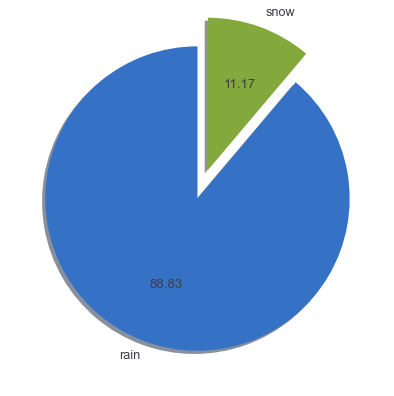

In [12]:
uni_Precip_Type = df["Precip Type"].unique()
uni_Precip_Type_num = df.groupby("Precip Type").size()
colors = ['lightskyblue', 'lightcoral']
plt.pie(x = uni_Precip_Type_num , labels = uni_Precip_Type , shadow = True , explode = (0,0.2) , autopct='%0.2f', startangle = 90)
plt.show()

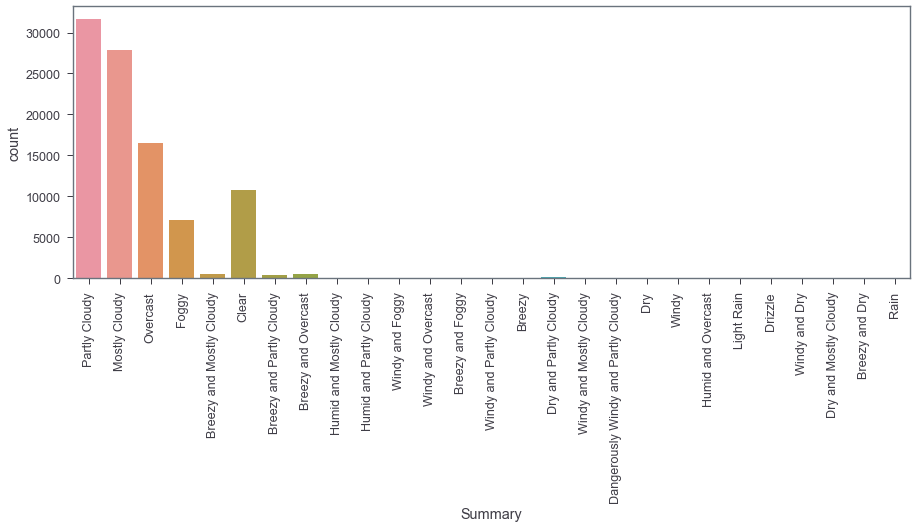

In [13]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="90")
sns.countplot(x = "Summary", data = df)
plt.show()

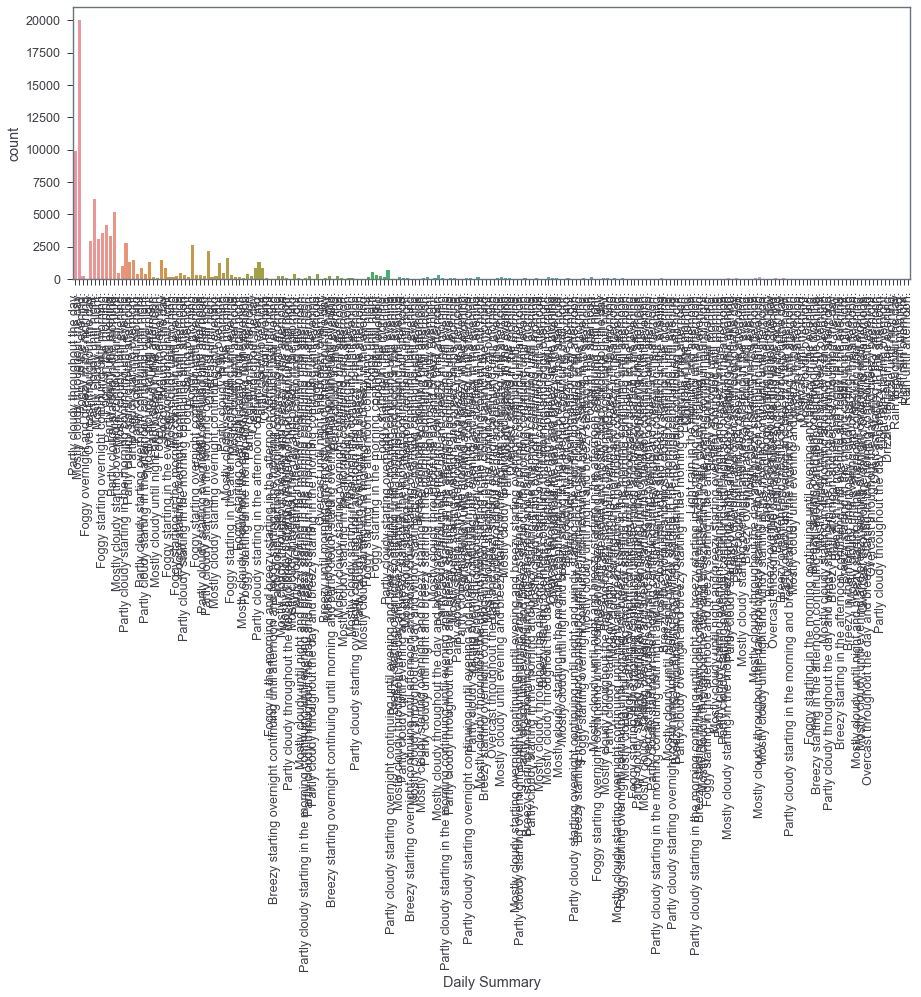

In [14]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="90")
sns.countplot(x = "Daily Summary", data = df)
plt.show()

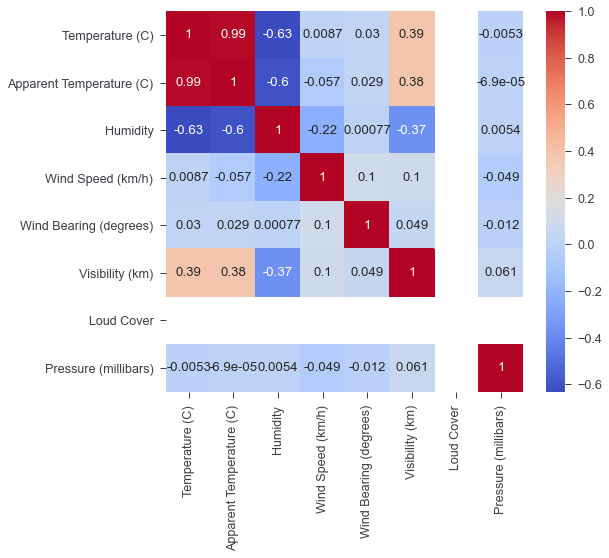

In [15]:
sns.heatmap(df.corr(),annot = True , cmap="coolwarm")
plt.show()

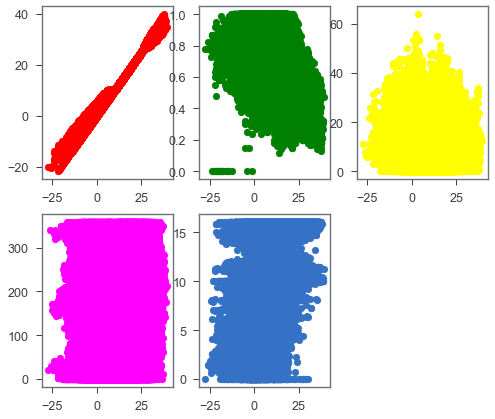

In [16]:
figure = plt.figure("Correlation Plot")
temperature = figure.add_subplot(2,3,1)
humidity = figure.add_subplot(2,3,2)
wind_speed = figure.add_subplot(2,3,3)
wind_bearing = figure.add_subplot(2,3,4)
visibility = figure.add_subplot(2,3,5)
temperature.scatter(df["Apparent Temperature (C)"],df["Temperature (C)"],color="red")
humidity.scatter(df["Apparent Temperature (C)"],df["Humidity"],color="green")
wind_speed.scatter(df["Apparent Temperature (C)"],df["Wind Speed (km/h)"],color="yellow")
wind_bearing.scatter(df["Apparent Temperature (C)"],df["Wind Bearing (degrees)"],color="magenta")
visibility.scatter(df["Apparent Temperature (C)"],df["Visibility (km)"])
plt.show()

In [17]:
encoder = LabelEncoder()
df = pd.get_dummies(df , columns = ["Summary"])
df["Daily Summary"] = encoder.fit_transform(df["Daily Summary"])
df["Precip Type"] = encoder.fit_transform(df["Precip Type"])

In [18]:
df.columns

Index(['Formatted Date', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Summary_Breezy',
       'Summary_Breezy and Dry', 'Summary_Breezy and Foggy',
       'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast',
       'Summary_Breezy and Partly Cloudy', 'Summary_Clear',
       'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle',
       'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summar

In [19]:
df["Daily Summary"].unique()

array([197, 111,  33,  36, 143, 209, 132,  57,  35, 204, 170,  94, 118,
       166, 156, 188, 205, 187, 155,  95, 198, 120,  43,  60,  42, 119,
        47,  51, 162,  59,  63,  52,  41, 175, 169, 147,  91,  37, 150,
        83,  39, 112,  58,  97,  45, 148,  29, 154, 152, 144,  34,  18,
       183,  96,  84, 195,  98, 157, 128, 165, 193, 194,  61, 146,  28,
        82,  23, 149,  89,  79,  72,  80, 174, 171,  75,  40,  64,  48,
        62,  49, 181, 179,  20, 105, 202,  71,  19, 109,   3,  88, 208,
         2,  99, 104, 191, 164, 192,  85, 153, 159, 200, 178, 176, 103,
       110,  22,  76, 142, 190, 115, 121, 158, 134,  90, 182, 203,  16,
       160,  92, 107,  21, 108, 137, 136,  81, 126, 207, 201, 186,  15,
        55, 125,  32, 124,  54,  25, 106, 177,  74,  93,  56, 117,  50,
        44, 173,  53,  86, 141, 163, 167, 127,   6, 129, 180,   7, 151,
        66,  69,  65, 168,  14, 102,  38,   1, 130, 185, 184,  77, 172,
         9, 206,  87,  11,  73, 101, 100, 131,   0,  10, 139,  2

In [20]:
df = df.drop("Formatted Date" , axis = 1)
Y = df[["Precip Type"]]
X = df.drop("Precip Type" , axis = 1)

In [21]:
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Summary_Breezy,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,197,0,...,0,0,1,0,0,0,0,0,0,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,197,0,...,0,0,1,0,0,0,0,0,0,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197,0,...,1,0,0,0,0,0,0,0,0,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,197,0,...,0,0,1,0,0,0,0,0,0,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,197,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,170,0,...,0,0,1,0,0,0,0,0,0,0
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,170,0,...,0,0,1,0,0,0,0,0,0,0
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,170,0,...,0,0,1,0,0,0,0,0,0,0
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,170,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
Y

,Precip Type
0,0
1,0
2,0
3,0
4,0
...,...
96448,0
96449,0
96450,0
96451,0


# KNN With SKlearn 

In [23]:
def KNN_SKL(X , Y , weights) :
    neighbors = [1 , 3 , 5 , 7]
    target_names = ["rain","snow"]
    error = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state = 42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    y_train = np.array(y_train).ravel()
    fig, axs = plt.subplots(2, 2 , figsize = (15,20))
    fig.suptitle("Confusion Matrix")
    i , j = 0 , 0
    for neighbor in neighbors:
        print(f"For the N Neighbors Equal {neighbor} : ")
        knn = KNeighborsClassifier(n_neighbors = neighbor  , weights = weights)
        knn.fit(X_train,y_train)
        pred = knn.predict(X_test)
        score = knn.score(X_test ,y_test)
        print("The Test Scord is : " , score)
        print(classification_report(y_test,pred,target_names=target_names))
        cm = confusion_matrix(y_test , pred)
        plt.figure(figsize=(9,9))
        sns.heatmap(cm, fmt=".3f" ,annot = True, linewidths = .5, square = True, cmap = 'Blues_r' , ax = axs[i,j])
        axs[i,j].set_ylabel('Actual label');
        axs[i,j].set_xlabel('Predicted label');
        axs[i,j].set_title(f"The Confusion Matrix For Neighbor Equal {neighbor} is : \n", size = 15)    
        if i == 0 :
            if j == 0 :
                j += 1 
            else :
                j -= 1
                i += 1
        else :
            j += 1 
        print("-----------------------------------------------------------")
    plt.show()

In [24]:
time.asctime()

'Fri Oct  8 15:54:31 2021'

For the N Neighbors Equal 1 : 
The Test Scord is :  0.9785219784802736
              precision    recall  f1-score   support

        rain       0.99      0.99      0.99     21222
        snow       0.92      0.89      0.91      2756

    accuracy                           0.98     23978
   macro avg       0.95      0.94      0.95     23978
weighted avg       0.98      0.98      0.98     23978

-----------------------------------------------------------
For the N Neighbors Equal 3 : 
The Test Scord is :  0.9794394861956793
              precision    recall  f1-score   support

        rain       0.99      0.99      0.99     21222
        snow       0.93      0.89      0.91      2756

    accuracy                           0.98     23978
   macro avg       0.96      0.94      0.95     23978
weighted avg       0.98      0.98      0.98     23978

-----------------------------------------------------------
For the N Neighbors Equal 5 : 
The Test Scord is :  0.9812327967303361
             

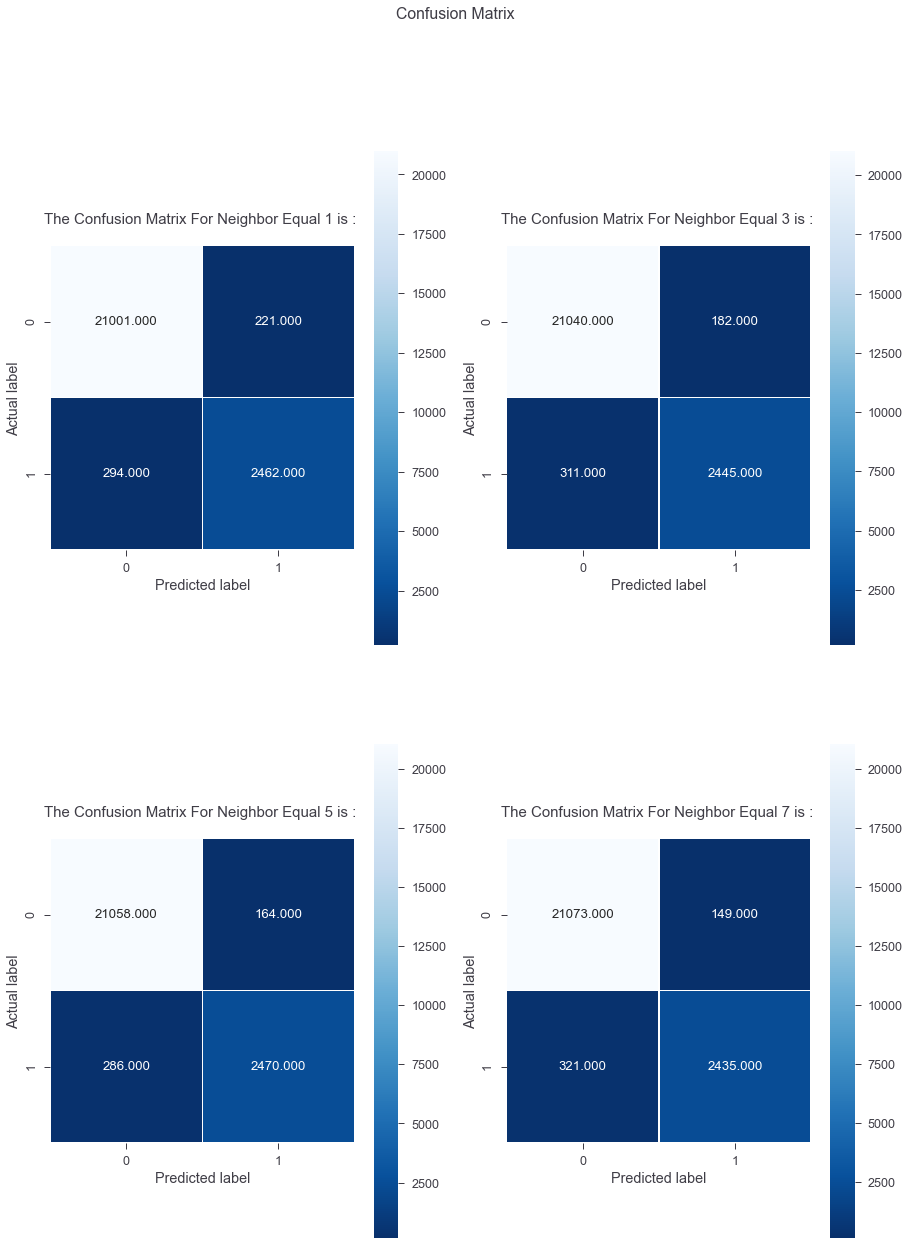

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

In [25]:
KNN_SKL(X,Y , "uniform")

In [26]:
time.asctime()

'Fri Oct  8 16:14:17 2021'

For the N Neighbors Equal 1 : 
The Test Scord is :  0.9785219784802736
              precision    recall  f1-score   support

        rain       0.99      0.99      0.99     21222
        snow       0.92      0.89      0.91      2756

    accuracy                           0.98     23978
   macro avg       0.95      0.94      0.95     23978
weighted avg       0.98      0.98      0.98     23978

-----------------------------------------------------------
For the N Neighbors Equal 3 : 
The Test Scord is :  0.9797731253649179
              precision    recall  f1-score   support

        rain       0.99      0.99      0.99     21222
        snow       0.93      0.89      0.91      2756

    accuracy                           0.98     23978
   macro avg       0.96      0.94      0.95     23978
weighted avg       0.98      0.98      0.98     23978

-----------------------------------------------------------
For the N Neighbors Equal 5 : 
The Test Scord is :  0.9819417799649679
             

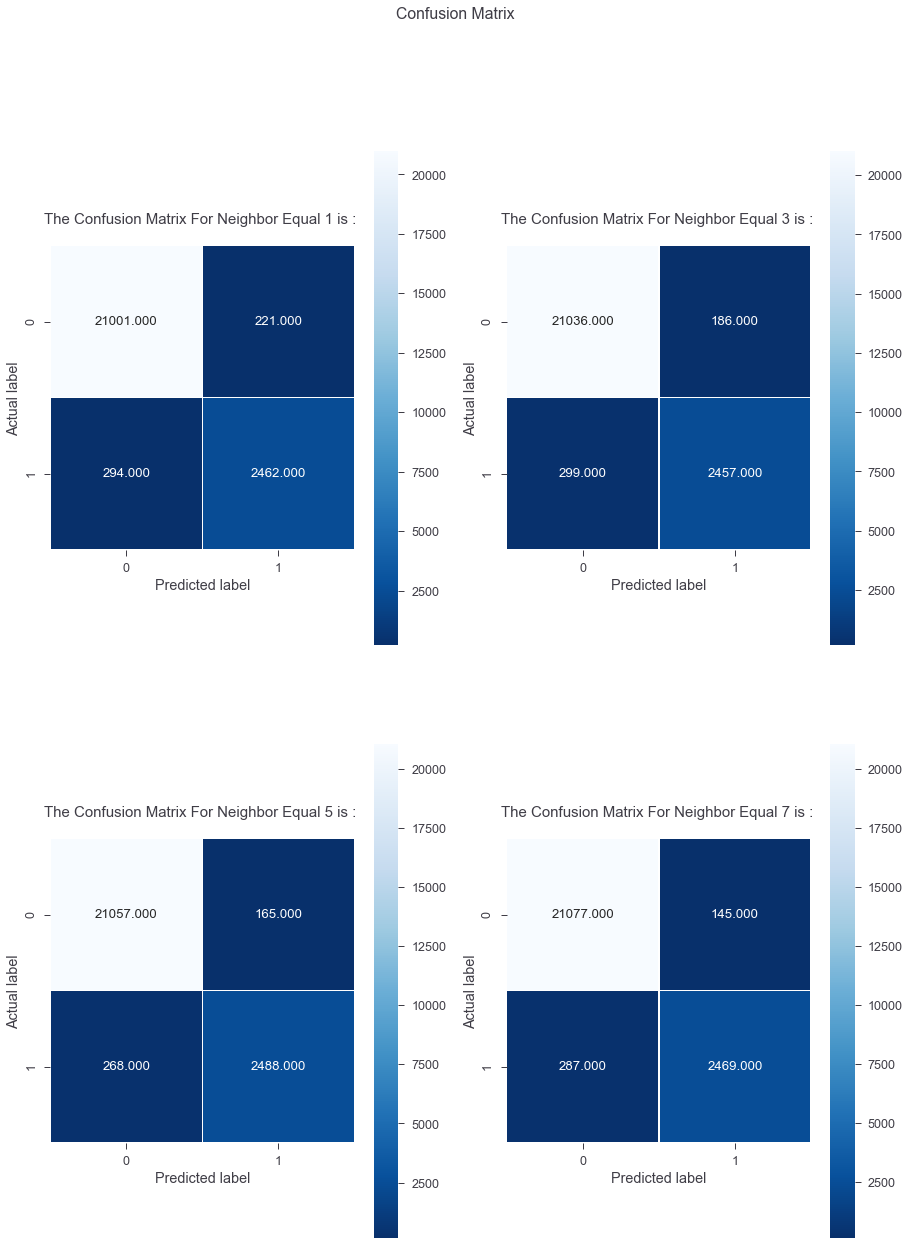

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

In [27]:
KNN_SKL(X,Y , "distance")

In [28]:
time.asctime()

'Fri Oct  8 16:37:47 2021'

# KNN From Scratch 

In [30]:
X = df.iloc[:,1:5]

In [31]:
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h)
0,9.472222,7.388889,0.89,14.1197
1,9.355556,7.227778,0.86,14.2646
2,9.377778,9.377778,0.89,3.9284
3,8.288889,5.944444,0.83,14.1036
4,8.755556,6.977778,0.83,11.0446
...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963
96449,24.583333,24.583333,0.48,10.0947
96450,22.038889,22.038889,0.56,8.9838
96451,21.522222,21.522222,0.60,10.5294


In [32]:
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
#Function to calculate KNN
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y.iloc[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab) 
    return op_labels

In [33]:
def My_KNN(X , Y) :
    X_train, X_test, y_train, y_test = train_test_split(X , Y , test_size = 0.5 , random_state = 42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    neighbors = [1 , 3 , 5 , 7]
    fig, axs = plt.subplots(2, 2 , figsize = (15,20))
    fig.suptitle("Confusion Matrix")
    i , j = 0 , 0
    for i in neighbors :
        y_pred = predict(X_train,y_train,X_test , i)
        score = accuracy_score(y_test, y_pred)
        print("The Test Scord is : " , score)
        print(classification_report(y_test,y_pred,target_names=target_names))
        cm = confusion_matrix(y_test , y_pred)
        plt.figure(figsize=(9,9))
        sns.heatmap(cm, fmt=".3f" ,annot = True, linewidths = .5, square = True, cmap = 'Blues_r' , ax = axs[i,j])
        axs[i,j].set_ylabel('Actual label');
        axs[i,j].set_xlabel('Predicted label');
        axs[i,j].set_title(f"The Confusion Matrix For Neighbor Equal {neighbor} is : \n", size = 15)       
        if i == 0 :
            if j == 0 :
                j += 1 
            else :
                j -= 1
                i += 1
        else :
            j += 1 
        print("-----------------------------------------------------------")
    plt.show()

In [34]:
time.asctime()

'Fri Oct  8 16:40:44 2021'

# My_KNN(X,Y)

In [35]:
time.asctime()

'Fri Oct  8 16:40:45 2021'

### For the different weight functions there is a little bit difference in each 

# NOTE : Please don't run this notebook again regarding the time it has been running before reaches almost 20 minutes for the sklearn function 
# For my code actualy it hasn't been done running for 12 hours because of the number of data records 
# SO .. please just check the results of sklearn function and the code which i've written
